## Importando Bibliotecas usada no problema

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Ajustando configurações de plot

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## [3b]

In [3]:
x = np.arange(0,15,0.20)
mean1 = 7
mean2 = 10
deav1 = math.sqrt(1)
deav2 = math.sqrt(1)

data1 = []
data2 = []
data3 = []
data4 = []
for i in x:
    f_x_1 = (1/(deav1*math.sqrt(2*math.pi)))*math.exp(((-1/2)*((i-mean1)/deav1)**2))
    f_x_2 = (1/(deav2*math.sqrt(2*math.pi)))*math.exp(((-1/2)*((i-mean2)/deav2)**2))
    f_x_3 = f_x_1*0.99
    f_x_4 = f_x_2*0.01
    data1.append(f_x_1)
    data2.append(f_x_2)
    data3.append(f_x_3)
    data4.append(f_x_4)

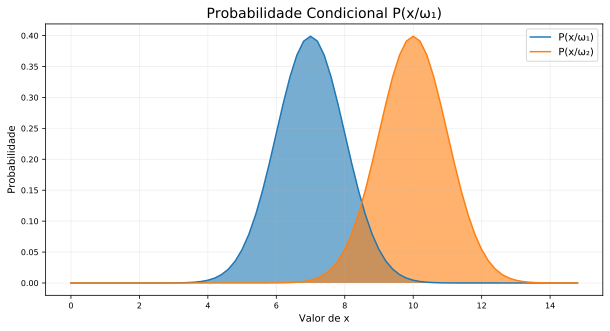

In [4]:
plt.plot(x, data1, label="P(x/\u03C9\N{SUBSCRIPT ONE})")
plt.plot(x, data2, label="P(x/\u03C9\N{SUBSCRIPT TWO})")
plt.fill_between(x, data1, alpha = 0.6)
plt.fill_between(x, data2, alpha = 0.6)
plt.title("Probabilidade Condicional P(x/\u03C9\N{SUBSCRIPT ONE})")
plt.xlabel("Valor de x")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

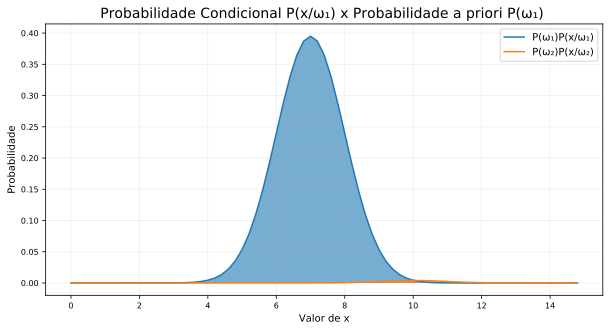

In [5]:
plt.plot(x, data3, label="P(\u03C9\N{SUBSCRIPT ONE})P(x/\u03C9\N{SUBSCRIPT ONE})")
plt.plot(x, data4, label="P(\u03C9\N{SUBSCRIPT TWO})P(x/\u03C9\N{SUBSCRIPT TWO})")
plt.fill_between(x, data3, alpha = 0.6)
plt.fill_between(x, data4, alpha = 0.6)
plt.title("Probabilidade Condicional P(x/\u03C9\N{SUBSCRIPT ONE}) x Probabilidade a priori P(\u03C9\N{SUBSCRIPT ONE}) ")
plt.xlabel("Valor de x")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

## 3[b]

### Criando um Classificador Bayesiano

In [6]:
## Classificador
def bayesanClassifier(mean1, deav1, pClass1, mean2, deav2, pClass2, data):
    results = []
    for x in data[0]:
        class1 = 0
        class2 = 0
        f_x_1 = (1/(deav1*math.sqrt(2*math.pi)))*math.exp(((-1/2)*((x-mean1)/deav1)**2))
        f_x_2 = (1/(deav2*math.sqrt(2*math.pi)))*math.exp(((-1/2)*((x-mean2)/deav2)**2))
        class1 = pClass1*f_x_1
        class2 = pClass2*f_x_2
        if class1 >= class2:
            results.append(0)
        else:
            results.append(1)
    return results


### Gerando n = 10000 amostras

In [7]:
##Criando os dados com 1000 amostras igualmente distribuidas entre classe1 e 2
class1Sample = np.random.normal(7, 1, 9900)
class2Sample = np.random.normal(10, 1, 100)

class1 = np.full(9900, 0)
dataClass1 = [class1Sample,class1]

class2 = np.full(100, 1)
dataClass2 = [class2Sample, class2]

dataFinal = np.concatenate((dataClass1, dataClass2), axis = 1)

### Plotando as amostras

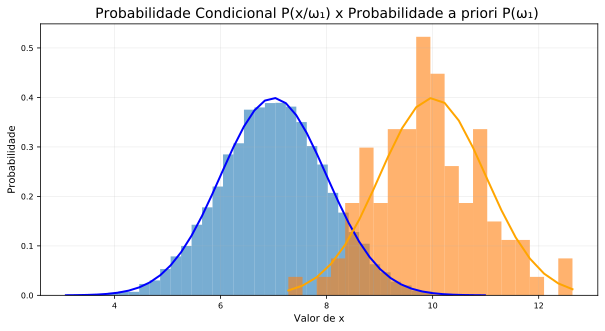

In [8]:
count, bins, ignored = plt.hist(class1Sample, 40, density=True, alpha = 0.6)
count2, bins2, ignored2 = plt.hist(class2Sample, 20, density=True, alpha = 0.6)
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 7)**2 / (2 * 1**2) ), linewidth=2, color='blue')
plt.plot(bins2, 1/(1 * np.sqrt(2 * np.pi)) * np.exp( - (bins2 - 10)**2 / (2 * 1**2) ), linewidth=2, color='orange')
plt.title("Probabilidade Condicional P(x/\u03C9\N{SUBSCRIPT ONE}) x Probabilidade a priori P(\u03C9\N{SUBSCRIPT ONE}) ")
plt.xlabel("Valor de x")
plt.ylabel("Probabilidade")
plt.grid(alpha=0.2)
plt.show()

### Classificando Amostras

In [9]:
results = bayesanClassifier(mean1, deav1, 0.99, mean2, deav2, 0.01, dataFinal)

### Calculando o erro do Classificador

In [10]:
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != dataFinal[1][i]:
        erros += 1


print('Erro de',((erros)/1000)*100, '%')

Erro de 0.2 %


## Plotando os dados de acordo com sua classificação

In [11]:
#Separar os dados para cada classe
class1Plot = []
class2Plot = []
for i in range(0, 1000):
    if results[i] == 0:
        class1Plot.append(dataFinal[0][i])
    else:
        class2Plot.append(dataFinal[0][i])
        

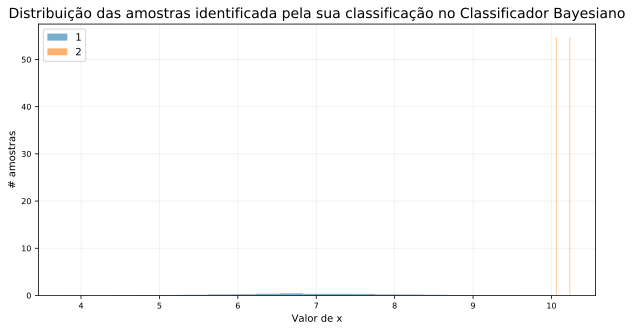

In [12]:
count, bins, ignored = plt.hist(class1Plot, 20, density=True, alpha = 0.6)
count2, bins2, ignored2 = plt.hist(class2Plot, 20, density=True, alpha = 0.6)
plt.title("Distribuição das amostras identificada pela sua classificação no Classificador Bayesiano")
plt.xlabel("Valor de x")
plt.ylabel("# amostras")
plt.grid(alpha=0.2)
plt.legend("12")
plt.show()

## Matrix de Confusão

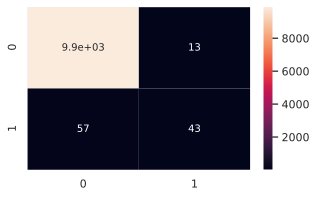

In [13]:
matrix = confusion_matrix(dataFinal[1], results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Acurácia

In [14]:
print((matrix[0][0]+matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]))

0.993


## Precisão (Especificidade)

In [15]:
print((matrix[0][0])/(matrix[0][0]+matrix[1][0]))

0.9942679002413516


## Revocação (Sensibilidade)

In [16]:
print((matrix[0][0])/(matrix[0][0]+matrix[0][1]))

0.9986868686868687
